In [225]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [226]:
# Cargamos los datos
T = np.loadtxt('muestra.txt')
N = T.shape[0]

# Verosimilitud

In [227]:
# Definimos el modelo estadistico
def p(z,theta):
  return 0.5*(1+theta*z)

In [228]:
# Funcion de verosimilitud
def L(theta):
  return np.prod(0.5*(1+theta*T))

In [229]:
# -LN de la Funcion de verosimilitud
def NLL(theta):
  return -np.sum(np.log((0.5*(1+theta*T))))

In [230]:
# -LN de la Funcion de verosimilitud en un dato
def NLL_i(z, theta):
  return -np.log((0.5*(1+theta*z)))

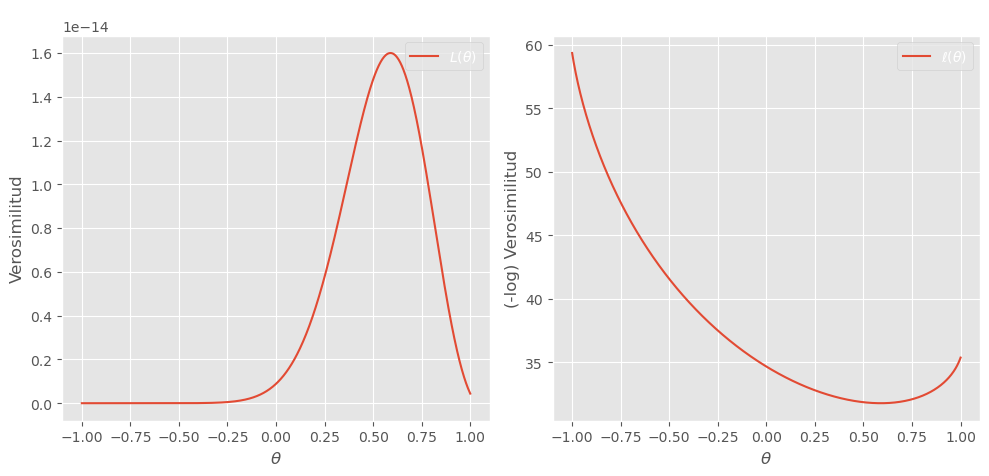

In [231]:
# Graficos

theta_range = np.linspace(-1,1,1000)

NLL_range = []
for i in range(len(theta_range)):
  NLL_range.append(NLL(theta_range[i]))

L_range = []
for i in range(len(theta_range)):
  L_range.append(L(theta_range[i]))

fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(theta_range, L_range, label=r'$L(\theta)$')
axes[0].set_title(r'Verosimilitud en función de $\theta$')
axes[0].set_xlabel(r'$\theta$')
axes[0].set_ylabel('Verosimilitud')
axes[0].legend()

axes[1].plot(theta_range, NLL_range, label=r'$\ell(\theta)$')
axes[1].set_title(r'(-log) Verosimilitud en función de $\theta$')
axes[1].set_xlabel(r'$\theta$')
axes[1].set_ylabel('(-log) Verosimilitud')
axes[1].legend()

plt.tight_layout()
plt.show()

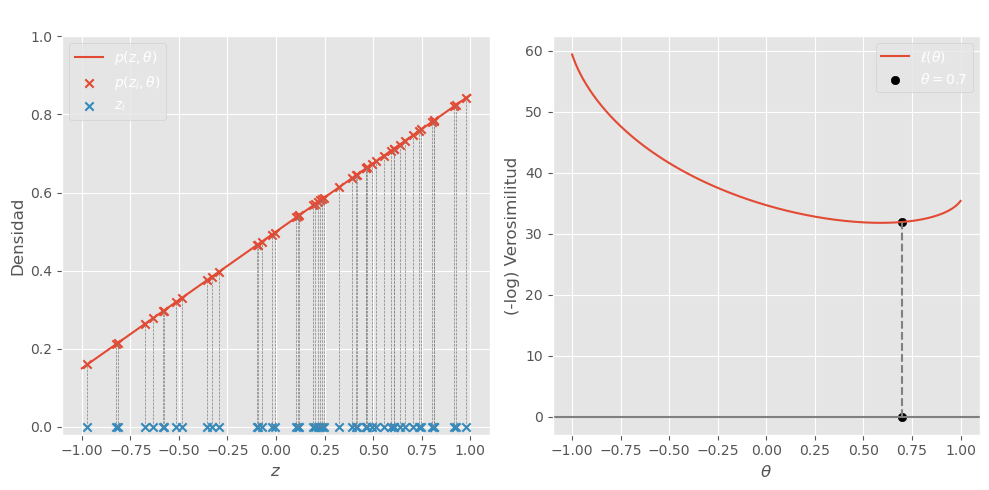

In [232]:
# Otro grafico

theta = 0.7
theta_range = np.linspace(-1,1,1000)

NLL_range = []
for i in range(len(theta_range)):
  NLL_range.append(NLL(theta_range[i]))

z_range = np.linspace(-1,1,100)

fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(z_range,p(z_range,theta), label=r'$p(z,\theta)$')
axes[0].set_ylim(-0.02,1)

for i in range(N):
  axes[0].plot([T[i],T[i]],[0,p(T[i],theta)],linestyle='dashed',color='gray', linewidth=0.5)

axes[0].scatter(T, p(T,theta), marker='x', label=r'$p(z_i,\theta)$')
axes[0].scatter(T, [0]*N, marker='x', label=r'$z_i$')
axes[0].set_title(r'Densidad $p(z;\theta)$ para $\theta=$'+str(theta))
axes[0].set_xlabel(r'$z$')
axes[0].set_ylabel('Densidad')
axes[0].legend()

axes[1].plot(theta_range, NLL_range, label=r'$\ell(\theta)$')
axes[1].plot([theta,theta],[0,NLL(theta)],linestyle='dashed',color='gray')
axes[1].scatter([theta,theta],[0,NLL(theta)], color='black', label=r'$\theta=$'+str(theta))
axes[1].axhline(y=0,color='gray')
axes[1].set_title(r'(-log) Verosimilitud en función de $\theta$')
axes[1].set_xlabel(r'$\theta$')
axes[1].set_ylabel('(-log) Verosimilitud')
axes[1].legend()

plt.tight_layout()
plt.show()

# Proportional Search

In [233]:
def proportional_search(f, a, b, tol, rho):
  """
  Algoritmo de minimizacion Proportional Search.

  Parametros:
  - f: Funcion a minimizar.
  - a, b: Intervalo inicial [a, b].
  - tol: Tolerancia.
  - rho: Proporcion.

  Output:
  - x_opt: minimo estimado.
  - history_x: historia de x_opt.
  - history_f: historia de f(x_opt).
  """
  # Inicializamos x_opt arbitrariamente
  x_opt = (a + b) / 2

  # Inicializamos las historias
  history_x = [x_opt]
  history_f = [f(x_opt)]

  # Contador de iteraciones
  Iter = 0
  
  while (b-a) > tol:
  #Me detengo cuando la variación es mínima

    Iter += 1
    x = a + rho * (b-a)
    fx = f(x)
    y = b - rho * (b-a)
    fy = f(y)
    #Evaluó la función en x e y

    print("      Iteración: ", Iter)
    print(f"a: {a:.3f}, x: {x:.3f}, y: {y:.3f}, b: {b:.3f}")

    if fx > fy:
    #Me quedo con el menor intervalo
      x_opt = y
      a = x
    else:
      x_opt = x
      b = y

    history_x.append(x_opt)
    history_f.append(f(x_opt))

  return x_opt, history_x, history_f

## Prueba 1
Probamos con una muestra de 50 datos

In [234]:
theta_hat_PS, history_theta_PS, history_NLL_PS = proportional_search(f=NLL, a=-1, b=1, tol=1e-5, rho=0.3)

      Iteración:  1
a: -1.000, x: -0.400, y: 0.400, b: 1.000
      Iteración:  2
a: -0.400, x: 0.020, y: 0.580, b: 1.000
      Iteración:  3
a: 0.020, x: 0.314, y: 0.706, b: 1.000
      Iteración:  4
a: 0.314, x: 0.520, y: 0.794, b: 1.000
      Iteración:  5
a: 0.314, x: 0.458, y: 0.650, b: 0.794
      Iteración:  6
a: 0.458, x: 0.559, y: 0.693, b: 0.794
      Iteración:  7
a: 0.458, x: 0.529, y: 0.623, b: 0.693
      Iteración:  8
a: 0.529, x: 0.578, y: 0.644, b: 0.693
      Iteración:  9
a: 0.529, x: 0.563, y: 0.609, b: 0.644
      Iteración:  10
a: 0.563, x: 0.587, y: 0.620, b: 0.644
      Iteración:  11
a: 0.563, x: 0.580, y: 0.603, b: 0.620
      Iteración:  12
a: 0.563, x: 0.575, y: 0.591, b: 0.603
      Iteración:  13
a: 0.575, x: 0.583, y: 0.594, b: 0.603
      Iteración:  14
a: 0.583, x: 0.589, y: 0.597, b: 0.603
      Iteración:  15
a: 0.583, x: 0.587, y: 0.593, b: 0.597
      Iteración:  16
a: 0.583, x: 0.586, y: 0.590, b: 0.593
      Iteración:  17
a: 0.586, x: 0.588, y: 0.

In [235]:
print(f'El optimo estimado de theta es: {theta_hat_PS:.3f}')

El optimo estimado de theta es: 0.589


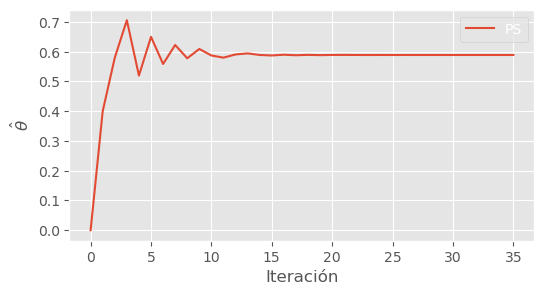

In [236]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_PS, label=r'PS')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

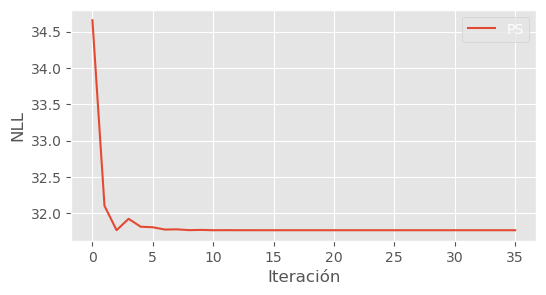

In [237]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_PS, label=r'PS')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

## Prueba 2
Probamos con una muestra con mayor cantidad de datos en este caso seran 500 datos.

In [238]:
# Cargamos los datos de la segunda muestra
T_2 = np.loadtxt('muestra_500.txt')

In [239]:
# -LN de la Funcion de verosimilitud con segunda muestra de 500 datos
def NLL_2(theta):
  return -np.sum(np.log((0.5*(1+theta*T_2))))

In [240]:
theta_hat_PS, history_theta_PS, history_NLL_PS = proportional_search(f=NLL_2, a=-1, b=1, tol=1e-5, rho=0.3)

      Iteración:  1
a: -1.000, x: -0.400, y: 0.400, b: 1.000
      Iteración:  2
a: -0.400, x: 0.020, y: 0.580, b: 1.000
      Iteración:  3
a: 0.020, x: 0.314, y: 0.706, b: 1.000
      Iteración:  4
a: 0.020, x: 0.226, y: 0.500, b: 0.706
      Iteración:  5
a: 0.226, x: 0.370, y: 0.562, b: 0.706
      Iteración:  6
a: 0.226, x: 0.327, y: 0.461, b: 0.562
      Iteración:  7
a: 0.226, x: 0.296, y: 0.391, b: 0.461
      Iteración:  8
a: 0.296, x: 0.346, y: 0.412, b: 0.461
      Iteración:  9
a: 0.296, x: 0.331, y: 0.377, b: 0.412
      Iteración:  10
a: 0.331, x: 0.355, y: 0.387, b: 0.412
      Iteración:  11
a: 0.355, x: 0.372, y: 0.395, b: 0.412
      Iteración:  12
a: 0.355, x: 0.367, y: 0.383, b: 0.395
      Iteración:  13
a: 0.367, x: 0.375, y: 0.386, b: 0.395
      Iteración:  14
a: 0.367, x: 0.373, y: 0.381, b: 0.386
      Iteración:  15
a: 0.367, x: 0.371, y: 0.377, b: 0.381
      Iteración:  16
a: 0.371, x: 0.374, y: 0.378, b: 0.381
      Iteración:  17
a: 0.374, x: 0.376, y: 0.

In [241]:
print(f'El optimo estimado de theta es: {theta_hat_PS:.3f}')

El optimo estimado de theta es: 0.376


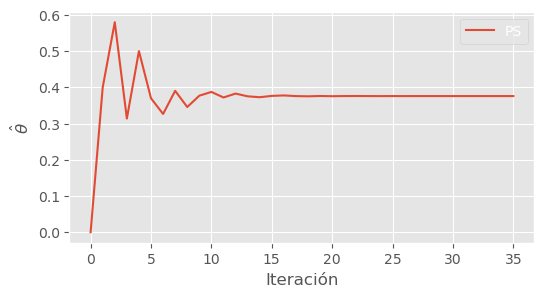

In [242]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_PS, label=r'PS')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

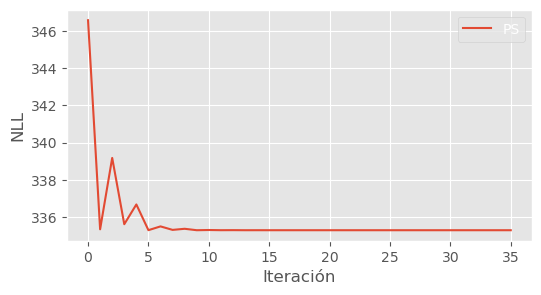

In [243]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_PS, label=r'PS')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

## Prueba 3
Mejoramos pero aun no tenemos un error considerable con respecto al tita en generación, así que volvemos a probar con una muestra con mayor cantidad de datos.

In [244]:
# Cargamos los datos de la tercer muestra
T_3 = np.loadtxt('muestra_50000.txt')

In [245]:
# -LN de la Funcion de verosimilitud con segunda muestra de 50.000 datos
def NLL_3(theta):
  return -np.sum(np.log((0.5*(1+theta*T_3))))

In [246]:
theta_hat_PS, history_theta_PS, history_NLL_PS = proportional_search(f=NLL_3, a=-1, b=1, tol=1e-5, rho=0.3)

      Iteración:  1
a: -1.000, x: -0.400, y: 0.400, b: 1.000
      Iteración:  2
a: -0.400, x: 0.020, y: 0.580, b: 1.000
      Iteración:  3
a: 0.020, x: 0.314, y: 0.706, b: 1.000
      Iteración:  4
a: 0.020, x: 0.226, y: 0.500, b: 0.706
      Iteración:  5
a: 0.020, x: 0.164, y: 0.356, b: 0.500
      Iteración:  6
a: 0.164, x: 0.265, y: 0.399, b: 0.500
      Iteración:  7
a: 0.164, x: 0.235, y: 0.329, b: 0.399
      Iteración:  8
a: 0.235, x: 0.284, y: 0.350, b: 0.399
      Iteración:  9
a: 0.284, x: 0.319, y: 0.365, b: 0.399
      Iteración:  10
a: 0.284, x: 0.308, y: 0.341, b: 0.365
      Iteración:  11
a: 0.284, x: 0.301, y: 0.324, b: 0.341
      Iteración:  12
a: 0.301, x: 0.313, y: 0.329, b: 0.341
      Iteración:  13
a: 0.313, x: 0.321, y: 0.332, b: 0.341
      Iteración:  14
a: 0.313, x: 0.319, y: 0.326, b: 0.332
      Iteración:  15
a: 0.313, x: 0.317, y: 0.322, b: 0.326
      Iteración:  16
a: 0.317, x: 0.320, y: 0.324, b: 0.326
      Iteración:  17
a: 0.320, x: 0.322, y: 0.

In [247]:
print(f'El optimo estimado de theta es: {theta_hat_PS:.3f}')

El optimo estimado de theta es: 0.322


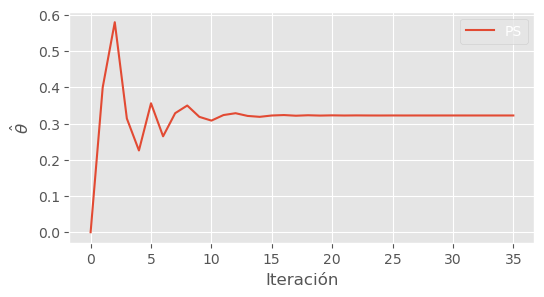

In [248]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_PS, label=r'PS')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

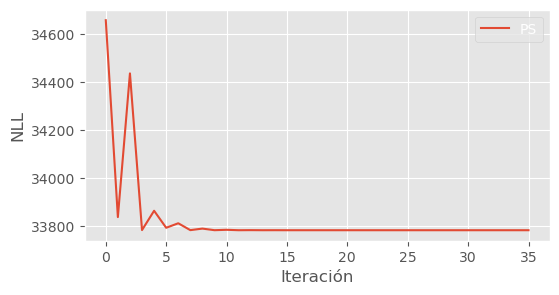

In [249]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_PS, label=r'PS')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

#### Conclusión
Con un mayor número de datos logramos una mejor optimización. La muestra de datos fue generada con una distribución de tita = 0.33.
El algortimo de búsqueda, logró minimizar la funcion de -ln verosimilitud en 0.322, para la muestra de 50.000 datos.
En este caso, se considera que el algorimo de optimización cumplió su función.

# Descenso por gradiente

In [250]:
def derivada_NLL(theta):
  return -np.sum(T/(1+theta*T))

In [251]:
def gradient_descent(f, x0, lr, tol, max_iter):
  """
  Algoritmo de minimización Descenso por Gradiente.

  Parametros:
  - f: función a minimizar.
  - x0: estimación inicial.
  - lr: tasa de aprendizaje.
  - tol: tolerancia.
  - max_iter: número máximo de iteraciones.

  Output:
  - x_min: mínimo estimado.
  - history_x: historia de x_min.
  - history_f: historia de f(x_min).
  """
  # Inicializamos las historias
  history_x = [x0]
  history_f = [f(x0)]

  # Contador de iteraciones
  Iter = 0

  # Inicializamos x
  x = x0

  x_prima = f(x0)
  #Calculamos la derivada en ese punto
  while abs(x_prima) > tol and max_iter > Iter:

    Iter += 1

    x = x - lr * x_prima
    x_prima = f(x)

    print("       Iteración: ", Iter)
    print("       X: ", x)

    history_x.append(x)
    history_f.append(x_prima)

  return x, history_x, history_f

In [252]:
theta_hat_GD, history_theta_GD, history_NLL_GD = gradient_descent(derivada_NLL, 0, 0.001, 0.01, 1000)

       Iteración:  1
       X:  0.0093374486641394
       Iteración:  2
       X:  0.018533234799555574
       Iteración:  3
       X:  0.027590176411021954
       Iteración:  4
       X:  0.036510981499555936
       Iteración:  5
       X:  0.04529825460187327
       Iteración:  6
       X:  0.05395450285280491
       Iteración:  7
       X:  0.062482141612821375
       Iteración:  8
       X:  0.07088349969843005
       Iteración:  9
       X:  0.07916082424935017
       Iteración:  10
       X:  0.08731628526295845
       Iteración:  11
       X:  0.09535197982347873
       Iteración:  12
       X:  0.10326993605070892
       Iteración:  13
       X:  0.11107211679069777
       Iteración:  14
       X:  0.11876042306866279
       Iteración:  15
       X:  0.12633669732254874
       Iteración:  16
       X:  0.13380272643393562
       Iteración:  17
       X:  0.14116024457149148
       Iteración:  18
       X:  0.14841093586080803
       Iteración:  19
       X:  0.15555643689323864

In [253]:
print(f'El óptimo estimado de theta es: {theta_hat_GD:.3f}')

El óptimo estimado de theta es: 0.589


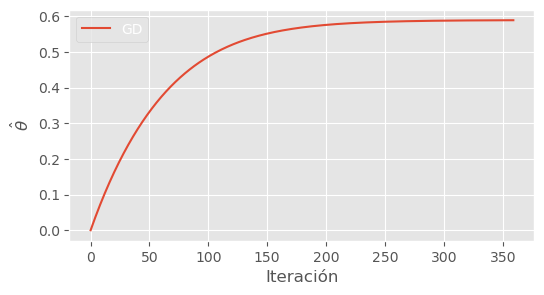

In [254]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_GD, label=r'GD')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

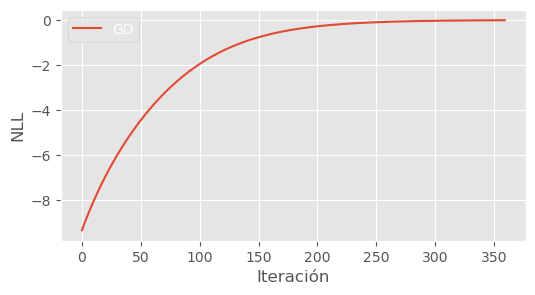

In [255]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_GD, label=r'GD')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

### Prueba 2
Evaluamos con una muestra de datos mayor.

In [256]:
#Derivada de NLL con muestra de datos 2

def derivada_NLL_2(theta):
  return -np.sum(T_2/(1+theta*T_2))

In [257]:
theta_hat_GD, history_theta_GD, history_NLL_GD = gradient_descent(derivada_NLL_2, 0, 1e-4, 0.01, 1000)

       Iteración:  1
       X:  0.005933835042784243
       Iteración:  2
       X:  0.011773381945065931
       Iteración:  3
       X:  0.017520396271729913
       Iteración:  4
       X:  0.023176582417919755
       Iteración:  5
       X:  0.02874359601885227
       Iteración:  6
       X:  0.034223046212188295
       Iteración:  7
       X:  0.039616497763658255
       Iteración:  8
       X:  0.044925473065733516
       Iteración:  9
       X:  0.05015145401831549
       Iteración:  10
       X:  0.05529588379967386
       Iteración:  11
       X:  0.06036016853519486
       Iteración:  12
       X:  0.06534567887089315
       Iteración:  13
       X:  0.07025375145808892
       Iteración:  14
       X:  0.07508569035515084
       Iteración:  15
       X:  0.07984276835174939
       Iteración:  16
       X:  0.08452622822064937
       Iteración:  17
       X:  0.08913728390169139
       Iteración:  18
       X:  0.09367712162226624
       Iteración:  19
       X:  0.0981469009582

In [258]:
print(f'El óptimo estimado de theta es: {theta_hat_GD:.3f}')

El óptimo estimado de theta es: 0.376


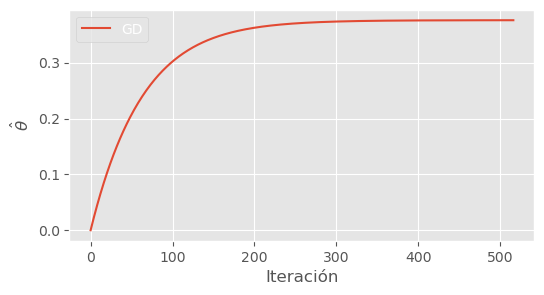

In [259]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_GD, label=r'GD')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

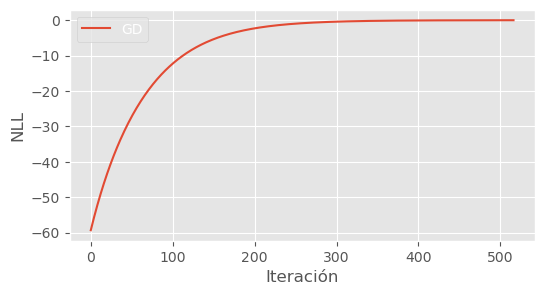

In [260]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_GD, label=r'GD')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

### Prueba 3
Evaluamos con muestra de 50.000 datos

In [261]:
#Derivada de NLL con muestra de datos 3

def derivada_NLL_3(theta):
  return -np.sum(T_3/(1+theta*T_3))

In [262]:
theta_hat_GD, history_theta_GD, history_NLL_GD = gradient_descent(derivada_NLL_3, 0, 1e-4, 0.01, 1000)

       Iteración:  1
       X:  0.5365191327097276
       Iteración:  2
       X:  0.10298098925106991
       Iteración:  3
       X:  0.47044093227159256
       Iteración:  4
       X:  0.1855073079116909
       Iteración:  5
       X:  0.41811891160126646
       Iteración:  6
       X:  0.23994789464412508
       Iteración:  7
       X:  0.3821058743098662
       Iteración:  8
       X:  0.2731839518238709
       Iteración:  9
       X:  0.35898568949410253
       Iteración:  10
       X:  0.2930375024402765
       Iteración:  11
       X:  0.344625505622305
       Iteración:  12
       X:  0.3048600717377029
       Iteración:  13
       X:  0.33584662385565406
       Iteración:  14
       X:  0.3119120718029472
       Iteración:  15
       X:  0.3305220104688236
       Iteración:  16
       X:  0.31612794077697853
       Iteración:  17
       X:  0.3273057657265714
       Iteración:  18
       X:  0.318652793076813
       Iteración:  19
       X:  0.32536738936133347
       Iteració

In [263]:
print(f'El óptimo estimado de theta es: {theta_hat_GD:.3f}')

El óptimo estimado de theta es: 0.322


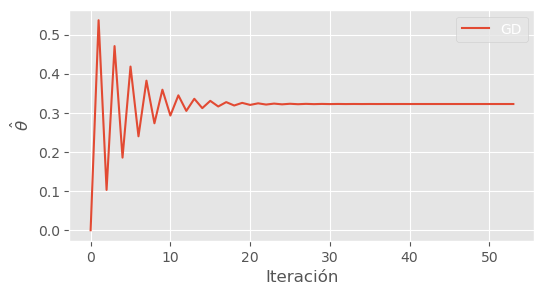

In [264]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_GD, label=r'GD')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

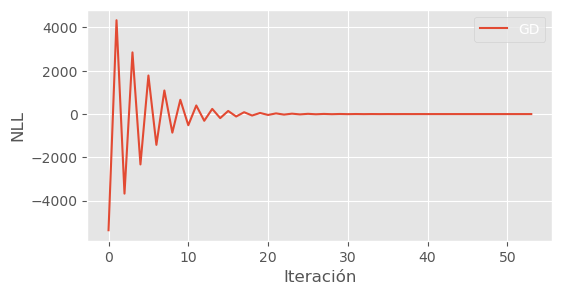

In [265]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_GD, label=r'GD')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

### Conclusión
Volvemos a alcanzar una optimización de la función para tita = 0.322 para la muestra de datos 3. Este valor es aceptable considerando que originamos nuestros datos con una distribución con tita = 0.33.

# Descenso por Gradiente Estocástico

In [266]:
def derivada_NLL_i(z, theta):
  return -np.sum(z/(1+theta*z))

In [267]:
def stochastic_gradient_descent(f, x0, datos, lr, epochs):
  """
  Algoritmo Stochastic Gradient Descent (SGD).

  Parametros:
  - f: Función a minimizar.
  - x0: Estimación inicial
  - datos: datos disponibles.
  - lr: tasa de aprendizaje.
  - epochs: número de épocas.

  Output:
  - x_min: mínimo estimado.
  - history_x: historia de x_min.
  - history_f: historia de f(x_min).
  """
  # Inicializamos las historias
  history_x = []
  history_f = []

  # Inicializamos x
  x = x0

  # Contador de iteraciones
  Iter = 0
  n_datos = len(datos)

  while Iter < epochs:
      Iter += 1
      indices = list(range(n_datos))
      np.random.shuffle(indices)  # Barajar los datos en cada época

      for i in range(0, n_datos):
          nuevo_indice = indices[i]
          z = datos[nuevo_indice]

          x_prima = f(z, x)
          x =  x - lr * x_prima

          history_x.append(x)
          history_f.append(x_prima)

      print(f"Época: {Iter}, X: {x}")

  x_min = x
  return x_min, history_x, history_f

In [268]:
theta_hat_SGD, history_theta_SGD, history_NLL_SGD = stochastic_gradient_descent(derivada_NLL_i, 0, T, 0.01, 50)

Época: 1, X: 0.0860231364039922
Época: 2, X: 0.1641076870542635
Época: 3, X: 0.22989571722023708
Época: 4, X: 0.286423865782208
Época: 5, X: 0.33254523870692854
Época: 6, X: 0.3746687266604174
Época: 7, X: 0.40768344127656686
Época: 8, X: 0.44137891209805896
Época: 9, X: 0.46864964501005535
Época: 10, X: 0.4925582174824169
Época: 11, X: 0.5111115247601494
Época: 12, X: 0.5222535077695636
Época: 13, X: 0.5309304969554111
Época: 14, X: 0.540374630697778
Época: 15, X: 0.5454947187981977
Época: 16, X: 0.5539517877782624
Época: 17, X: 0.558233795968114
Época: 18, X: 0.561610355843742
Época: 19, X: 0.5669183262426899
Época: 20, X: 0.5706296350837715
Época: 21, X: 0.5703348165887013
Época: 22, X: 0.5705293676136297
Época: 23, X: 0.5710647542634738
Época: 24, X: 0.5698009236242997
Época: 25, X: 0.5739631806368208
Época: 26, X: 0.5768406527025602
Época: 27, X: 0.573950287087091
Época: 28, X: 0.5760230481318487
Época: 29, X: 0.5767735473727754
Época: 30, X: 0.5808943166450099
Época: 31, X: 0.582

In [269]:
print(f'El óptimo estimado de theta es: {theta_hat_SGD:.3f}')

El óptimo estimado de theta es: 0.589


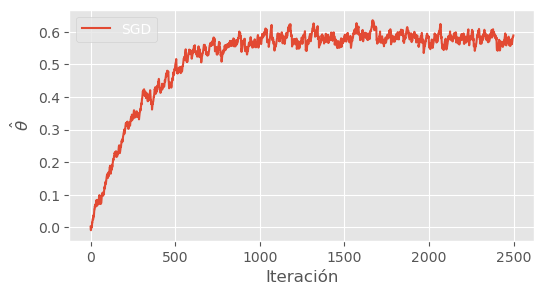

In [270]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_SGD, label=r'SGD')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

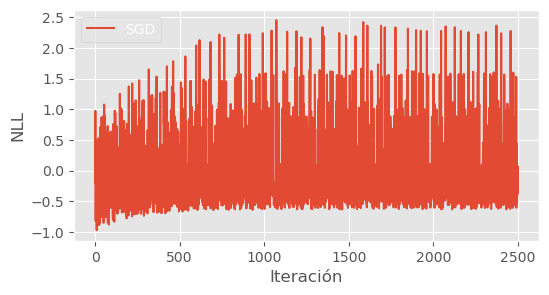

In [271]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_SGD, label=r'SGD')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

#### Se nota una leve mejora en comparación a los algoritmos anteriores. Procedo a comparar con muestras de datos de mayor tamaño.

In [272]:
theta_hat_SGD, history_theta_SGD, history_NLL_SGD = stochastic_gradient_descent(derivada_NLL_i, 0, T_2, 0.001, 100)

Época: 1, X: 0.05399875526570206
Época: 2, X: 0.10096144305967719
Época: 3, X: 0.14131072770103764
Época: 4, X: 0.17540226978428106
Época: 5, X: 0.2052738989745031
Época: 6, X: 0.23055412376735185
Época: 7, X: 0.25336304700738427
Época: 8, X: 0.2715015332752882
Época: 9, X: 0.28680650493619725
Época: 10, X: 0.30091827707658975
Época: 11, X: 0.31145045078830136
Época: 12, X: 0.3215427134809751
Época: 13, X: 0.32940171272234847
Época: 14, X: 0.33654252478664415
Época: 15, X: 0.34191120606015823
Época: 16, X: 0.34677064615235764
Época: 17, X: 0.3523384933106664
Época: 18, X: 0.3548074780381368
Época: 19, X: 0.3572968247426768
Época: 20, X: 0.36141262371637833
Época: 21, X: 0.36428718777233576
Época: 22, X: 0.3661909504300387
Época: 23, X: 0.36842291964079826
Época: 24, X: 0.36893834083219273
Época: 25, X: 0.3700759770224208
Época: 26, X: 0.37074166143402976
Época: 27, X: 0.37006256416053396
Época: 28, X: 0.3698361218981824
Época: 29, X: 0.37129306117877636
Época: 30, X: 0.3723538191673148

In [273]:
print(f'El óptimo estimado de theta es: {theta_hat_SGD:.3f}')

El óptimo estimado de theta es: 0.378


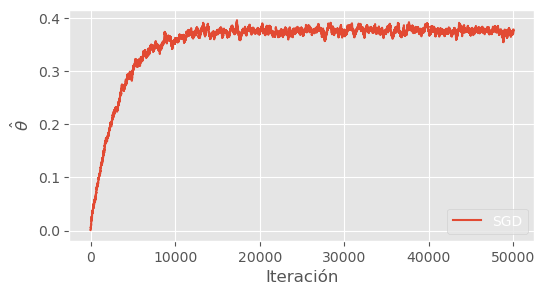

In [274]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_SGD, label=r'SGD')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

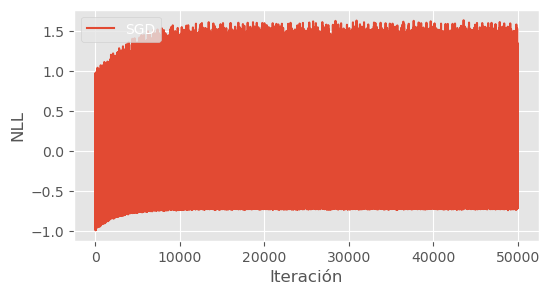

In [275]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_SGD, label=r'SGD')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

### Pruebo con la muestra 3

In [276]:
theta_hat_SGD, history_theta_SGD, history_NLL_SGD = stochastic_gradient_descent(derivada_NLL_i, 0, T_3, 1e-4, 100)

Época: 1, X: 0.2666189221736766
Época: 2, X: 0.30811779084866614
Época: 3, X: 0.3169960558780118
Época: 4, X: 0.32155547191517375
Época: 5, X: 0.3173737238019724
Época: 6, X: 0.3208656933924572
Época: 7, X: 0.32281056931354063
Época: 8, X: 0.3208080650985456
Época: 9, X: 0.319378762646051
Época: 10, X: 0.3221160112430662
Época: 11, X: 0.32511718128886014
Época: 12, X: 0.325986246497846
Época: 13, X: 0.3162797917283203
Época: 14, X: 0.3207287119842374
Época: 15, X: 0.32383068328546133
Época: 16, X: 0.3254192686007244
Época: 17, X: 0.32753256162117733
Época: 18, X: 0.32401178154603616
Época: 19, X: 0.32008706832107015
Época: 20, X: 0.31893767017364016
Época: 21, X: 0.3238736362123009
Época: 22, X: 0.3255879196735864
Época: 23, X: 0.3288696086804219
Época: 24, X: 0.3241792363075792
Época: 25, X: 0.3210945085027198
Época: 26, X: 0.31832384800572444
Época: 27, X: 0.32514657043253786
Época: 28, X: 0.3178759907040405
Época: 29, X: 0.3182004382161224
Época: 30, X: 0.3249918305629042
Época: 31,

In [277]:
print(f'El óptimo estimado de theta es: {theta_hat_SGD:.3f}')

El óptimo estimado de theta es: 0.323


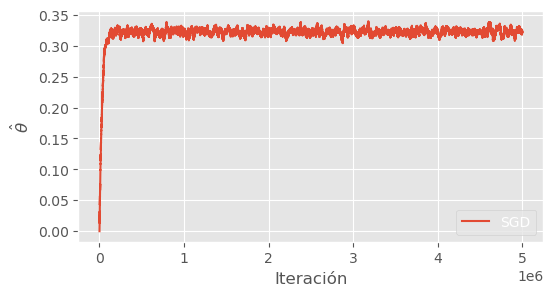

In [278]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_SGD, label=r'SGD')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

c:\Users\Octav\anaconda3\envs\ml-para-ia\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


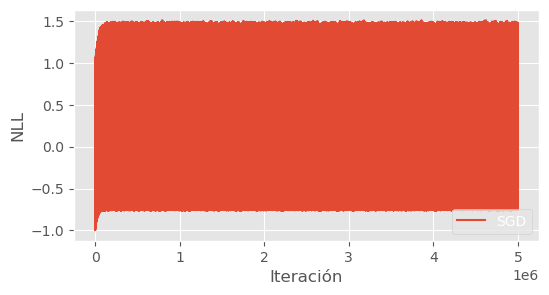

In [279]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_SGD, label=r'SGD')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

In [280]:
print(theta_hat_PS)
print(theta_hat_GD)
print(theta_hat_SGD)

0.3224424101989046
0.32244184621761673
0.322779886000047
